<a href="https://colab.research.google.com/github/RaihanFazzaufaR/22_RaihanFazzaufaRasendriya/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Gamma Correction


Gamma Correction pada citra 
--------------------------------
Masukkan nilai Gamma: 3


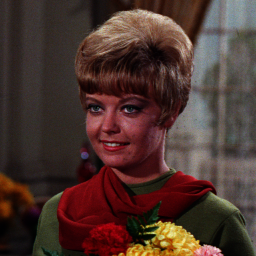

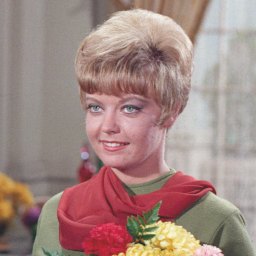

In [4]:
print('Gamma Correction pada citra ')
print('--------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error not a number')

img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_edit = img.copy()

def gamma_correction(img, gamma):
  inv_gamma = 1/gamma

  table = np.array([((i/255) ** inv_gamma) * 255 for i in np.arange(0, 256)])

  correct_img = cv.LUT(img, table)

  return correct_img

corrected_img = gamma_correction(img_edit, gamma)

cv2_imshow(img)
cv2_imshow(corrected_img)

# Image Depth

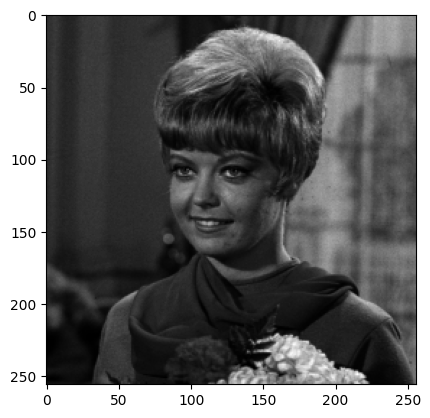

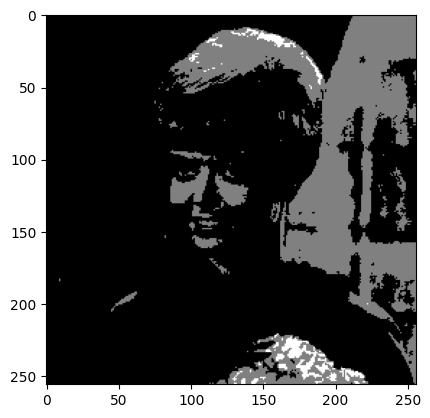

In [5]:
bit_depth = 2
level = 255 / (pow(2, bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
depth_image = original // level
plt.figure()
plt.imshow(original, cmap='gray')
plt.show()
plt.imshow(depth_image, cmap='gray')
plt.show()

# Average Denoising

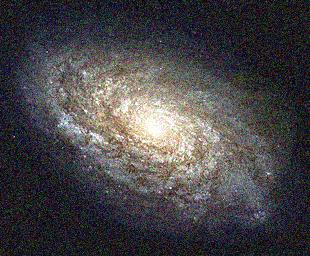

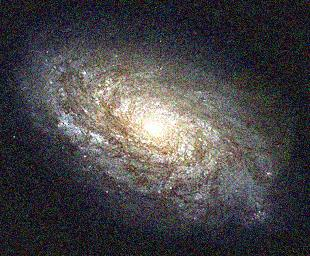

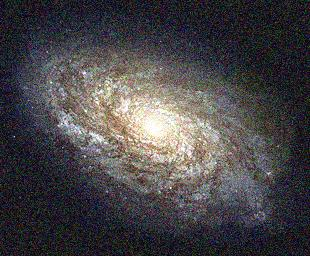

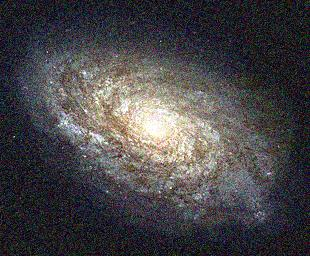

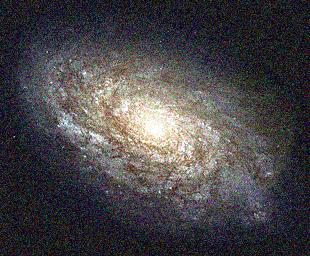

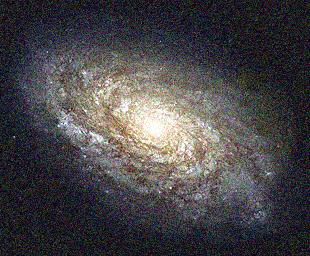

PSNR Image 5:  28.44665087799662
PSNR Image 10:  28.437074317701185
PSNR Image 20:  28.44086694737411
PSNR Image 40:  28.43696078766262
PSNR Image 80:  28.431761161926037
PSNR Image 100:  28.43788261991022


In [14]:
import glob
cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

cv2_imshow(cv_img[4])
cv2_imshow(cv_img[9])
cv2_imshow(cv_img[19])
cv2_imshow(cv_img[39])
cv2_imshow(cv_img[79])
cv2_imshow(cv_img[99])

def psnr(img):
  mse = np.mean((cv_img[0] - img) ** 2)
  if mse == 0:
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

psnr5 = psnr(cv_img[4])
psnr10 = psnr(cv_img[9])
psnr20 = psnr(cv_img[19])
psnr40 = psnr(cv_img[39])
psnr80 = psnr(cv_img[79])
psnr100 = psnr(cv_img[99])

print('PSNR Image 5: ', psnr5)
print('PSNR Image 10: ', psnr10)
print('PSNR Image 20: ', psnr20)
print('PSNR Image 40: ', psnr40)
print('PSNR Image 80: ', psnr80)
print('PSNR Image 100: ', psnr100)